# Black Friday Dataset EDA and Feature Engineering
Cleaning and Preparing data for model training

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# importing the dataset
df_train = pd.read_csv('train.csv')
df_train.shape

(550068, 12)

# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [11]:
df_test = pd.read_csv('test.csv')
df_test.shape

(233599, 11)

In [13]:
df = pd.concat([df_train, df_test])
df.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
184472,1004448,P00103242,M,26-35,14,A,0,0,8,NaN,NaN,9729.0
412058,1003462,P00358342,F,26-35,4,B,3,0,11,15.0,16.0,1704.0
35939,1005543,P00277642,M,26-35,17,A,2,0,2,3.0,10.0,10114.0
177246,1003125,P00148642,M,26-35,7,A,1,0,6,10.0,13.0,NaN
165468,1002907,P00125042,F,36-45,5,A,4+,0,11,NaN,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [17]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [19]:
df.drop(['User_ID'], axis = 1, inplace = True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [21]:
## handling Categorical feature age
df['Gender'] = df['Gender'].map({'F':0, 'M':1})

In [23]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [25]:
## Handling Categorical Feature age
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [27]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder( drop='first'),['City_Category'])
])

transformed_data = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed_data, columns=['B','C'])

df_dropped = df.drop(columns=['City_Category']).reset_index(drop=True)
transformed_df = transformed_df.reset_index(drop=True)

# Concatenate the transformed DataFrame with the original DataFrame (excluding 'City_Category')
df_final = pd.concat([df_dropped, transformed_df], axis=1)
df_final['B'] = df_final['B'].astype(int)
df_final['C'] = df_final['C'].astype(int)

In [30]:
df_final.sample(5)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
488520,P00134542,1,3,1,1,1,5,14.0,NaN,1766.0,1,0
276031,P00185342,1,5,8,1,1,3,4.0,NaN,2914.0,1,0
547634,P00370293,1,5,1,1,0,19,NaN,NaN,36.0,1,0
419852,P00209142,1,3,14,3,0,5,8.0,NaN,7062.0,0,0
356291,P00116742,1,7,16,2,1,11,NaN,NaN,7598.0,1,0


In [33]:
## Missing Values
df_final.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [35]:
## Focus on replacing Missing Values
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [37]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [39]:
df['Product_Category_1'].value_counts()

Product_Category_1
5     215950
1     200699
8     162294
11     34440
2      34056
6      29326
3      28791
4      16756
16     13933
15      8984
13      7930
10      7373
12      5610
7       5345
18      4436
20      2550
14      2186
19      1603
17       801
9        604
Name: count, dtype: int64

In [41]:
## Replace the missing value with mode
df_final['Product_Category_1']=df_final['Product_Category_1'].fillna(df_final['Product_Category_1']).mode()[0]

In [43]:
df_final['Product_Category_1'].isnull().sum()

0

In [45]:
df_final['Product_Category_2']=df_final['Product_Category_2'].fillna(df_final['Product_Category_2']).mode()[0]


In [47]:
df_final['Product_Category_2'].isnull().sum()


0

In [49]:
df_final['Product_Category_3']=df_final['Product_Category_3'].fillna(df_final['Product_Category_3']).mode()[0]

In [51]:
df_final['Product_Category_3'].isnull().sum()

0

In [53]:
df_final.shape

(783667, 12)

In [55]:
df_final.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,5,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,5,8.0,16.0,15200.0,0,0
2,P00087842,0,1,10,2,0,5,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,5,8.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,5,8.0,16.0,7969.0,0,1


In [57]:
df_final['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [59]:
df_final['Stay_In_Current_City_Years'] = df_final['Stay_In_Current_City_Years'].str.replace('+','')

In [61]:
df_final.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,5,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,5,8.0,16.0,15200.0,0,0
2,P00087842,0,1,10,2,0,5,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,5,8.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,5,8.0,16.0,7969.0,0,1


In [63]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(2), int64(5), object(2)
memory usage: 65.8+ MB


In [65]:
df_final['Stay_In_Current_City_Years'] = df_final['Stay_In_Current_City_Years'].astype(int)

In [67]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 62.8+ MB


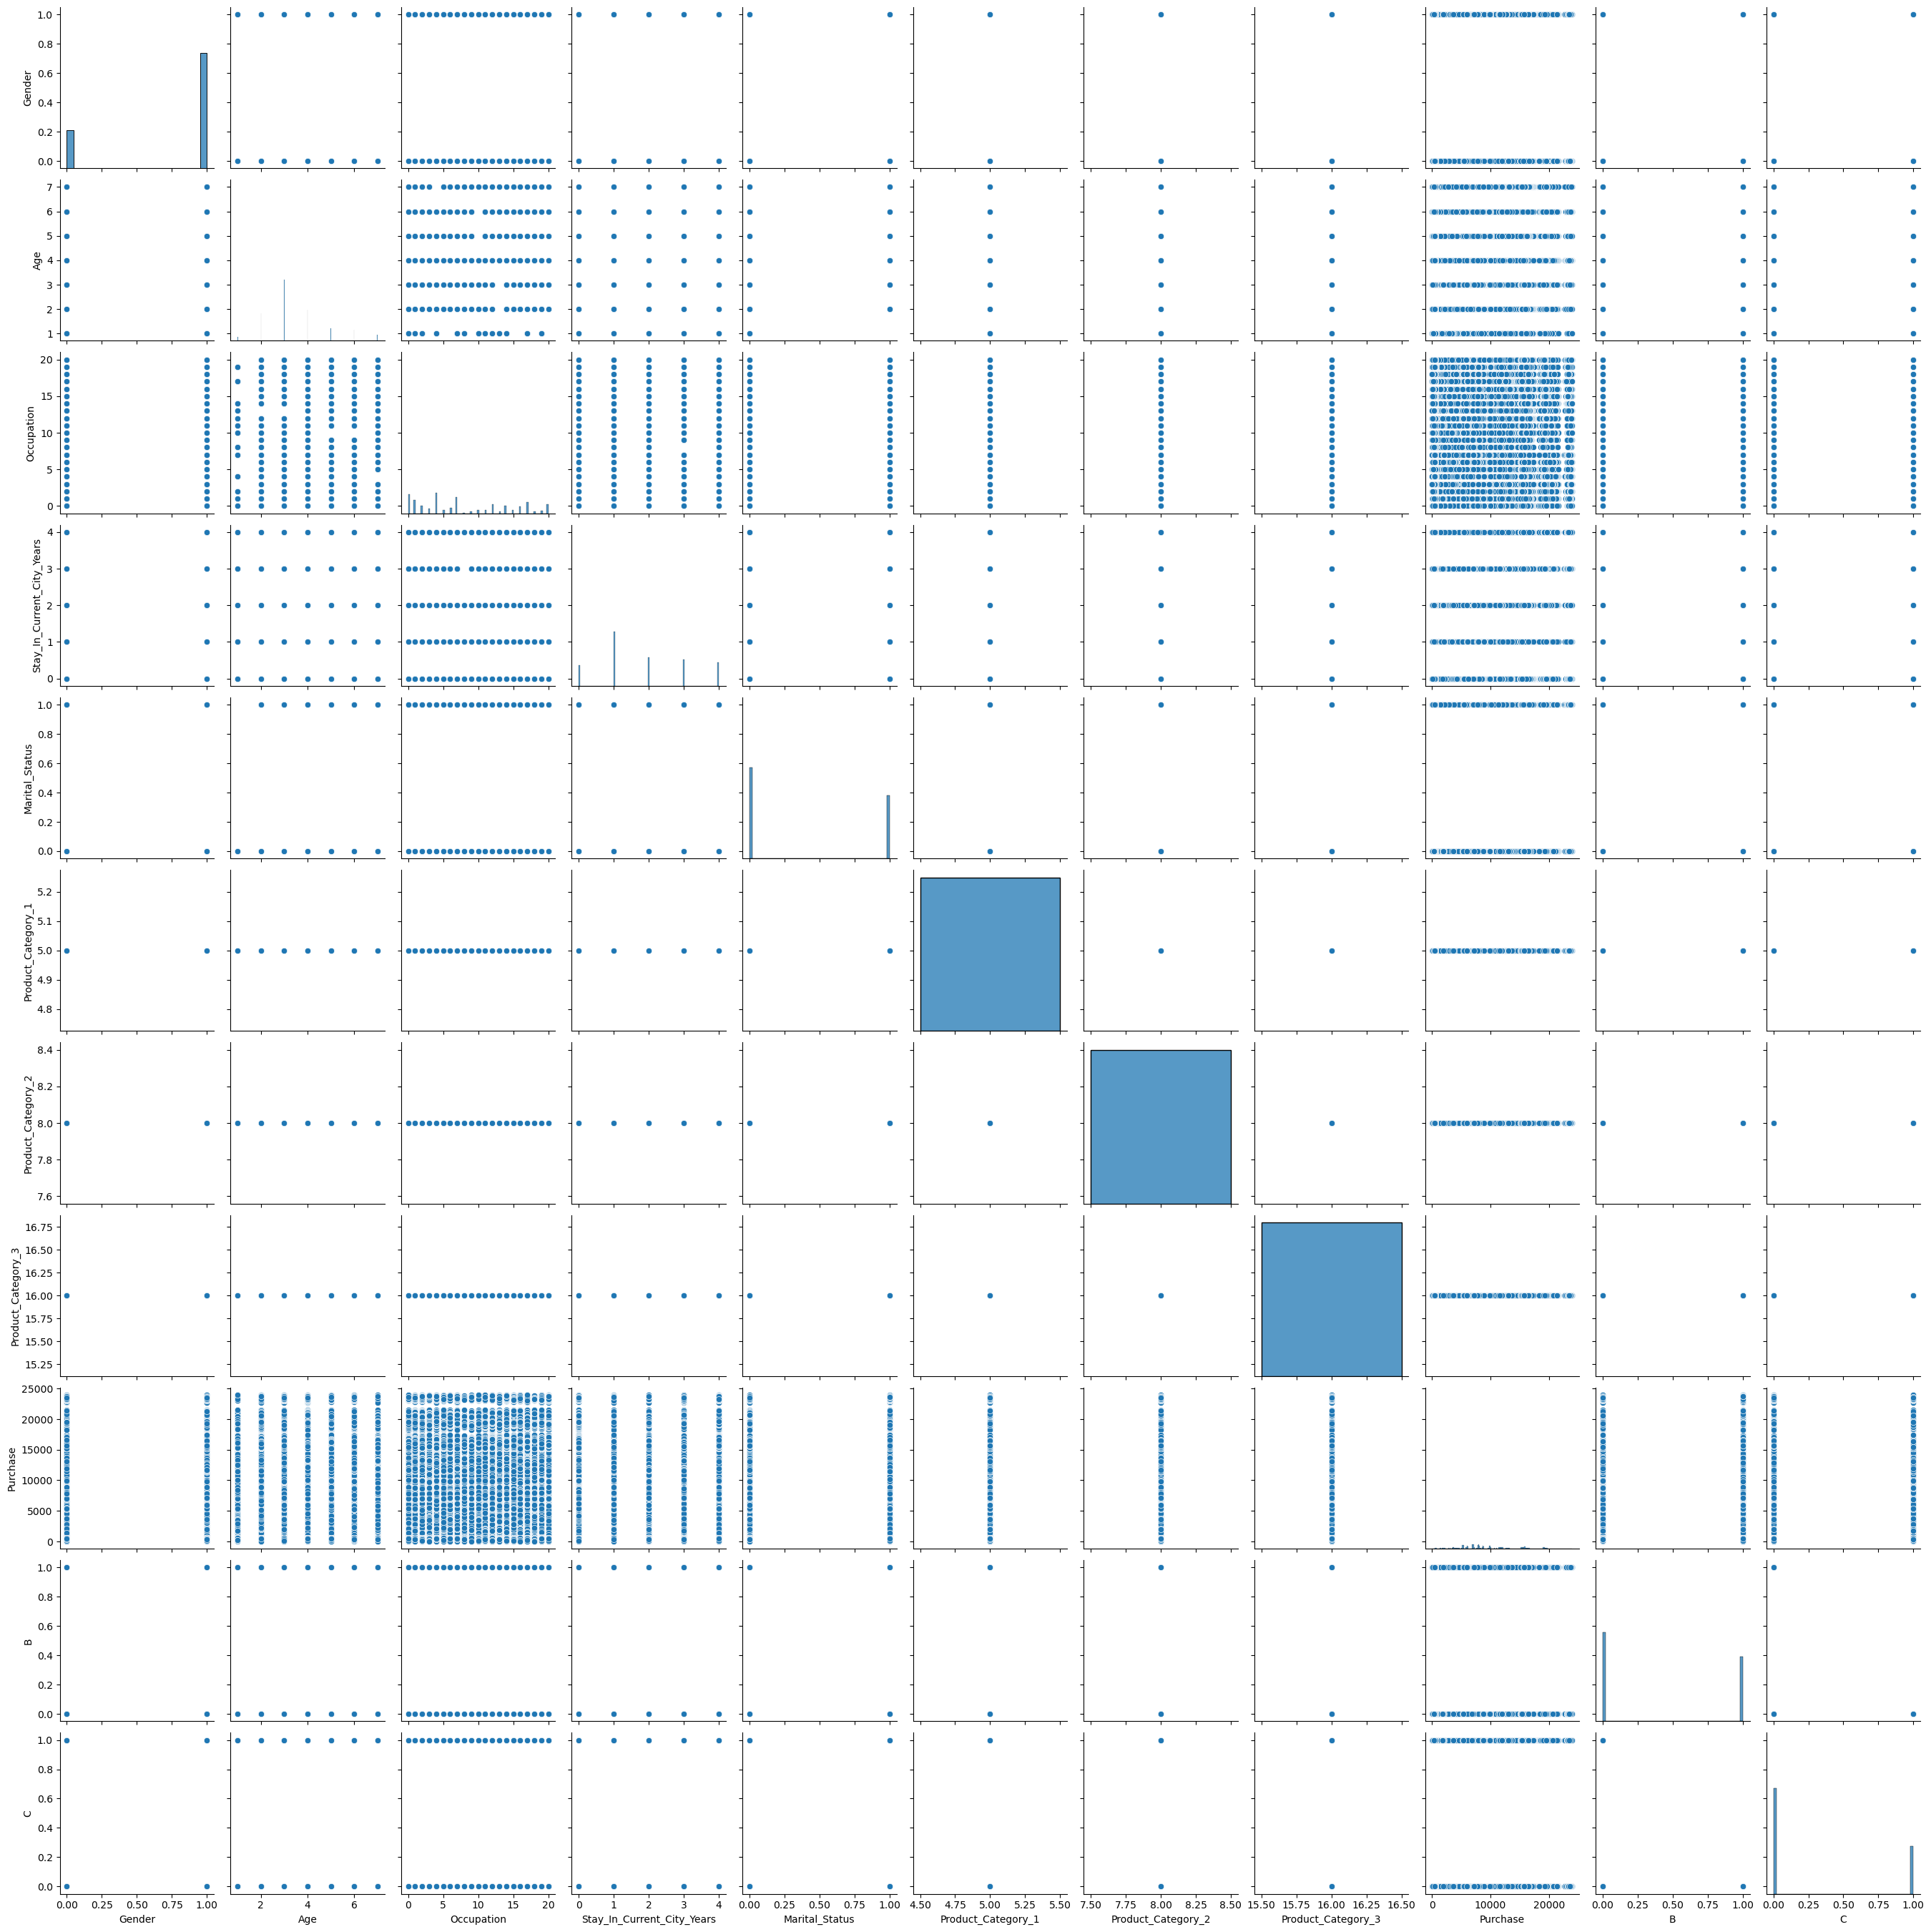

In [69]:
## Visualisation
sns.pairplot(df_final)
plt.show()

<Axes: xlabel='Age', ylabel='Purchase'>

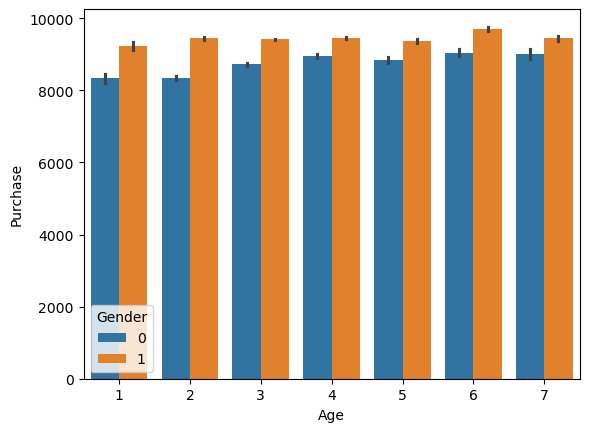

In [70]:
sns.barplot(x='Age',y='Purchase', hue='Gender',data=df_final)

# Observation
Men Purchasing is more than women

<Axes: xlabel='Occupation', ylabel='Purchase'>

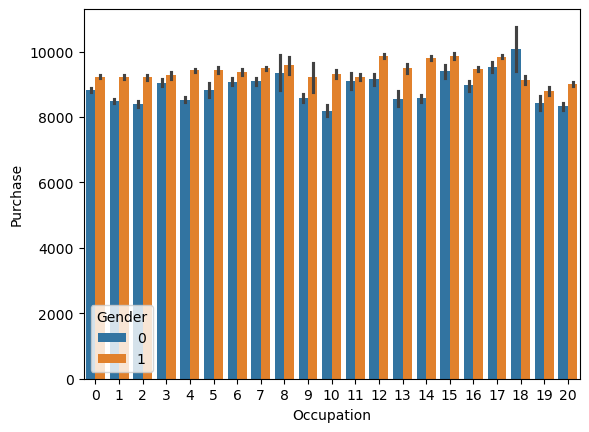

In [72]:
sns.barplot(x='Occupation', y = 'Purchase',hue='Gender',data=df_final)

In [73]:
df_final.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,5,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,5,8.0,16.0,15200.0,0,0
2,P00087842,0,1,10,2,0,5,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,5,8.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,5,8.0,16.0,7969.0,0,1


In [328]:
## Feature Scaling

In [74]:
df_test=df_final[df_final['Purchase'].isnull()]
df_train=df_final[~df_final['Purchase'].isnull()]


X=df_train.drop('Purchase',axis=1)
y=df_train['Purchase']

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split( X, y , test_size=0.3,random_state=42)

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [124]:
## model train

In [130]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [132]:
y_pred = model.predict(X_test)

In [136]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 24993761.151582677
R² Score: 0.008273619796933973


In [138]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R² Score: {r2_rf}")

Random Forest Mean Squared Error: 24105596.822707698
Random Forest R² Score: 0.04351505423165858
